<h1>
    Introduction to Artificial Neural Networks
</h1>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [3]:
iris = load_iris()
X = iris.data[:, (2, 3)] #petal length, petal width
y = (iris.target == 0).astype(np.int_) # Iris Setosa?

In [4]:
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

Perceptron(random_state=42)

In [5]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

In [6]:
from sklearn.linear_model import SGDClassifier

In [8]:
sgd_clf = SGDClassifier(loss="perceptron", learning_rate="constant",
                        eta0=0.1, penalty=None)

In [9]:
sgd_clf.fit(X, y)

SGDClassifier(eta0=0.1, learning_rate='constant', loss='perceptron',
              penalty=None)

In [10]:
y_pred = sgd_clf.predict([[2, 0.5]])
y_pred

array([1])

<h3>
    Training an MLP with Tensorflow's High-level API
</h3>

In [11]:
import tensorflow as tf

In [12]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [21]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.compat.v1.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)

Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/0h/mj3dn7c538n2p0dxmp9b9wpm0000gn/T/tmpr9voxsre', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_re

In [22]:
input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)

In [23]:
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Done calling model_fn.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/0h/mj3dn7c538n2p0dxmp9b9wpm0000gn/T/

2024-02-26 21:31:51.044784: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2024-02-26 21:31:51.050004: W tensorflow/core/common_runtime/type_inference.cc:339] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_INT64
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_INT32
    }
  }
}

	for Tuple type infernce function 0
	while inferring type of node 'dnn/zero_fraction/cond/output/_18'


Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:loss = 120.37013, step = 0
INFO:tensorflow:global_step/sec: 520.977
INFO:tensorflow:loss = 19.984745, step = 100 (0.192 sec)
INFO:tensorflow:global_step/sec: 589.528
INFO:tensorflow:loss = 14.6946745, step = 200 (0.170 sec)
INFO:tensorflow:global_step/sec: 591.356
INFO:tensorflow:loss = 2.2675166, step = 300 (0.169 sec)
INFO:tensorflow:global_step/sec: 596.388
INFO:tensorflow:loss = 12.266336, step = 400 (0.168 sec)
INFO:tensorflow:global_step/sec: 582.164
INFO:tensorflow:loss = 15.621475, step = 500 (0.172 sec)
INFO:tensorflow:global_step/sec: 592.864
INFO:tensorflow:loss = 7.57114, step = 600 (0.169 sec)
INFO:tensorflow:global_step/sec: 584.866
INFO:tensorflow:loss = 5.485446, step = 700 (0.170 sec)
INFO:tensorflow:global_step/sec: 601.075
INFO:tensorflow:loss = 2.594967, step = 800 (0.166 sec)
INFO:tensorflow:global_step/sec: 596.882
INFO:tensorflow:loss = 13.74677, step = 900 (0.168 sec)
INFO:tensorflow:global_step/se

In [25]:
test_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2024-02-26T22:09:41
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/0h/mj3dn7c538n2p0dxmp9b9wpm0000gn/T/tmpr9voxsre/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.17802s
INFO:tensorflow:Finished evaluation at 2024-02-26-22:09:41
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9814, average_loss = 0.09725133, global_step = 44000, loss = 12.310296
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: /var/folders/0h/mj3dn7c538n2p0dxmp9b9wpm0000gn/T/tmpr9voxsre/model.ckpt-44000


In [26]:
eval_results

{'accuracy': 0.9814,
 'average_loss': 0.09725133,
 'loss': 12.310296,
 'global_step': 44000}

<h1>
    Training a DNN using plain tensorflow
</h1>

<h3>
    Construction phase
</h3>

In [165]:
import tensorflow as tf

In [166]:
n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [167]:
X = tf.compat.v1.placeholder(tf.float32, shape=(None, n_inputs),
                             name="X")
y = tf.compat.v1.placeholder(tf.int32, shape=(None),
                             name="y")

In [105]:
tf.compat.v1.disable_eager_execution() # Run this cell before

<h3>
    Creating an actual neural network
</h3>

In [168]:
import numpy as np

In [169]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.compat.v1.truncated_normal((n_inputs, n_neurons),
                                             stddev=stddev)
        W = tf.Variable(init, name="weights")
        b = tf.Variable(tf.zeros([n_neurons]), name="biases")
        z = tf.matmul(X, W) + b
        if activation=="relu":
            return tf.nn.relu(z)
        else:
            return z
        

In [170]:
2 / np.sqrt(n_inputs)

0.07142857142857142

In [171]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, "hidden1", activation="relu")
    hidden2 = neuron_layer(hidden1, n_hidden2, "hidden2", activation="relu")
    logits = neuron_layer(hidden2, n_outputs, "outputs")


In [154]:
from tensorflow.keras.layers import Dense

In [155]:
with tf.name_scope("dnn"):
    x = tf.keras.Input((n_inputs, ))
    hidden2 = Dense(n_hidden2, name="hidden2", activation="relu")(x)
    logits = Dense(n_outputs, name="outputs", activation=None)(hidden2)
    
    #hidden2 = Dense(hidden1, n_hidden2, name="hidden2", activation="relu")
    #logits = Dense(hidden2, n_outputs, name="outputs")

In [172]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [173]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [174]:
with tf.name_scope("eval"):
    correct = tf.math.in_top_k(y, logits, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [175]:
init = tf.compat.v1.global_variables_initializer()
saver = tf.compat.v1.train.Saver()

In [176]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [177]:
n_epochs = 400
batch_size = 50


In [178]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [164]:
def reset_graph(seed=42):
    tf.compat.v1.reset_default_graph()
    tf.compat.v1.set_random_seed(seed)
    np.random.seed(seed)
reset_graph()

In [179]:
with tf.compat.v1.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "my_model_final.ckpt")

0 Batch accuracy: 0.92 Val accuracy: 0.9172
1 Batch accuracy: 0.94 Val accuracy: 0.934
2 Batch accuracy: 0.96 Val accuracy: 0.943
3 Batch accuracy: 0.9 Val accuracy: 0.9474
4 Batch accuracy: 0.96 Val accuracy: 0.951
5 Batch accuracy: 0.94 Val accuracy: 0.9552
6 Batch accuracy: 1.0 Val accuracy: 0.9582
7 Batch accuracy: 0.96 Val accuracy: 0.9626
8 Batch accuracy: 0.96 Val accuracy: 0.9632
9 Batch accuracy: 0.94 Val accuracy: 0.9656
10 Batch accuracy: 0.92 Val accuracy: 0.9674
11 Batch accuracy: 1.0 Val accuracy: 0.9686
12 Batch accuracy: 0.98 Val accuracy: 0.9686
13 Batch accuracy: 1.0 Val accuracy: 0.9692
14 Batch accuracy: 1.0 Val accuracy: 0.9704
15 Batch accuracy: 0.94 Val accuracy: 0.9734
16 Batch accuracy: 1.0 Val accuracy: 0.9726
17 Batch accuracy: 1.0 Val accuracy: 0.9726
18 Batch accuracy: 1.0 Val accuracy: 0.9738
19 Batch accuracy: 0.98 Val accuracy: 0.9746
20 Batch accuracy: 1.0 Val accuracy: 0.973
21 Batch accuracy: 1.0 Val accuracy: 0.9744
22 Batch accuracy: 0.96 Val accura

<h3>
    Using the trained neural network
</h3>

In [181]:
with tf.compat.v1.Session() as sess:
    saver.restore(sess, 'my_model_final.ckpt')
    X_new_scales = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scales})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from my_model_final.ckpt


In [182]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:20])

Predicted classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [186]:
import matplotlib.pyplot as plt

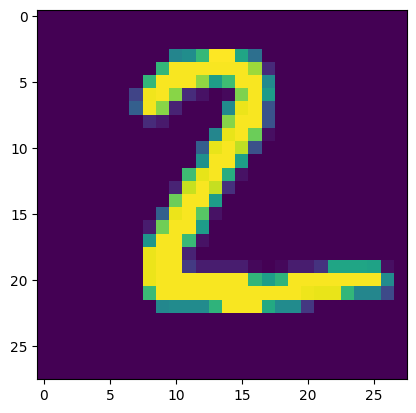

In [190]:
plt.imshow(X_test[1].reshape(28, 28))

In [197]:
from datetime import datetime
import os
root_logdir = os.path.join(os.curdir, "tf_logs")

def make_log_subdir(run_id=None):
    if run_id is None:
        run_id = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    return "{}/run-{}/".format(root_logdir, run_id)

def save_graph(graph=None, run_id=None):
    if graph is None:
        graph = tf.compat.v1.get_default_graph()
    logdir = make_log_subdir(run_id)
    file_writer = tf.compat.v1.summary.FileWriter(logdir, graph=graph)
    file_writer.close()
    return logdir

In [198]:
save_graph()

'./tf_logs/run-20240227161311/'

In [199]:
%load_ext tensorboard

In [200]:
%tensorboard --logdir {root_logdir}

<h1>
    Activation Functions and graph plotting
</h1>

In [201]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

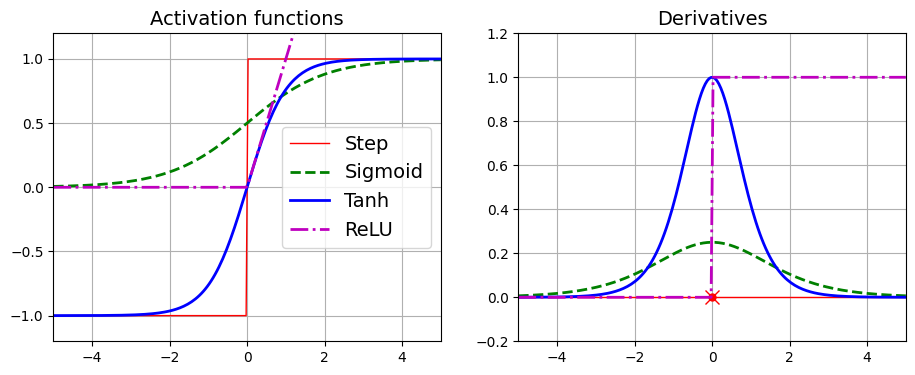

In [203]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()